<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Objetivo" data-toc-modified-id="Objetivo-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Objetivo</a></span></li><li><span><a href="#Explorando-os-Dados" data-toc-modified-id="Explorando-os-Dados-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Explorando os Dados</a></span></li><li><span><a href="#Treinando-KMeans" data-toc-modified-id="Treinando-KMeans-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>Treinando KMeans</a></span><ul class="toc-item"><li><span><a href="#Idade-e-Score" data-toc-modified-id="Idade-e-Score-3.1"><span class="toc-item-num">3.1&nbsp;&nbsp;</span>Idade e Score</a></span></li><li><span><a href="#Salário-Anual-e-Score" data-toc-modified-id="Salário-Anual-e-Score-3.2"><span class="toc-item-num">3.2&nbsp;&nbsp;</span>Salário Anual e Score</a></span></li></ul></li></ul></div>

Este notebook tem por objetivo alocar o desenvolvimento de um problema de negócio proposto pelo _Kaggle_: segmentação de clientes através do algoritmo `KMeans`. Dentro do contexto, o desenvolvedor do projeto é responsável por uma rede de supermercados e, através de informações de pagamentos com cartão de crédito/débito, tem-se informações dos clientes como ID, idade, gênero, salário anual e uma _pontuação de gastos_.

* **Pontuação de Gastos:** score desenvolvido a partir de parâmetros específicos do cliente, como comportamento e dados de compra.

## Objetivo

Como responsável pela rede de supermercados, é proposto o estudo dessa base de informações para entender os clientes e tirar insights sobre os clientes que poderiam ser fidelizados mais facilmente _(Target Customer)_, decidindo estratégias diferentes de acordo com os resultados obtidos.

## Explorando os Dados

In [1]:
# Importando pandas para leitura do arquivo
import pandas as pd

df = pd.read_csv('Mall_Customers.csv')
df.head()

CustomerID  Gender  Age  Annual Income (k$)  Spending Score (1-100)
0           1    Male   19                  15                      39
1           2    Male   21                  15                      81
2           3  Female   20                  16                       6
3           4  Female   23                  16                      77
4           5  Female   31                  17                      40

In [2]:
# Verificando dimensões
df.shape

(200, 5)

In [3]:
# Comunicando
print(f'O dataset contém {df.shape[0]} linhas e {df.shape[1]} colunas')

O dataset contém 200 linhas e 5 colunas


In [4]:
# Existem dados nulos?
df.isnull().sum()

CustomerID                0
Gender                    0
Age                       0
Annual Income (k$)        0
Spending Score (1-100)    0
dtype: int64

In [5]:
# Informações do dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
CustomerID                200 non-null int64
Gender                    200 non-null object
Age                       200 non-null int64
Annual Income (k$)        200 non-null int64
Spending Score (1-100)    200 non-null int64
dtypes: int64(4), object(1)
memory usage: 7.9+ KB


In [6]:
# Estatística
df.describe()

CustomerID         Age  Annual Income (k$)  Spending Score (1-100)
count  200.000000  200.000000          200.000000              200.000000
mean   100.500000   38.850000           60.560000               50.200000
std     57.879185   13.969007           26.264721               25.823522
min      1.000000   18.000000           15.000000                1.000000
25%     50.750000   28.750000           41.500000               34.750000
50%    100.500000   36.000000           61.500000               50.000000
75%    150.250000   49.000000           78.000000               73.000000
max    200.000000   70.000000          137.000000               99.000000

Vamos visualizar graficamente os dados

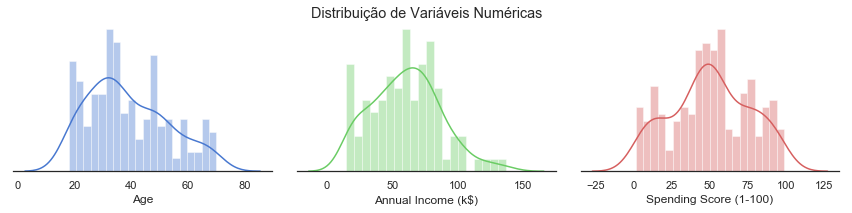

In [7]:
# Importando bibliotecas
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

# Configurando plot
sns.set(style='white', palette='muted', color_codes=True)
fig, axs = plt.subplots(1, 3, figsize=(12, 3))
sns.despine(left=True)
axs[0] = sns.distplot(df['Age'], bins=20, ax=axs[0])
axs[1] = sns.distplot(df['Annual Income (k$)'], bins=20, ax=axs[1], color='g')
axs[2] = sns.distplot(df['Spending Score (1-100)'], bins=20, ax=axs[2], color='r')

fig.suptitle('Distribuição de Variáveis Numéricas')
plt.setp(axs, yticks=[])
plt.tight_layout()
plt.show()

In [46]:
def format_spines(ax, right_border=True):
    """docstring for format_spines:
    função responsável por retirar bordas do gráfico e personalizar cor:
    input:
        ax: eixo do gráfico"""
    
    ax.spines['bottom'].set_color('#CCCCCC')
    ax.spines['left'].set_color('#CCCCCC')
    ax.spines['top'].set_color('#FFFFFF')
    if right_border:
        ax.spines['right'].set_color('#CCCCCC')
    else:
        ax.spines['right'].set_color('#FFFFFF')
    ax.patch.set_facecolor('#FFFFFF')

In [74]:
def count_plot(feature, df=df, colors='Blues_d', hue=False):
    """docstring for count_plot:
    função responsável pela plotagem de de dados categóricos
    input:
        x: feature
        colors = cores da plotagem"""
    
    # Analisando porcentagem das instâncias por risco e tipo de moradia
    ncount = len(df)
    fig, ax = plt.subplots()
    if hue != False:
        ax = sns.countplot(x=feature, data=df, palette=colors, hue=hue)
    else:
        ax = sns.countplot(x=feature, data=df, palette=colors)

    # Make twin axis
    ax2=ax.twinx()

    # Switch so count axis is on right, frequency on left
    ax2.yaxis.tick_left()
    ax.yaxis.tick_right()

    # Also switch the labels over
    ax.yaxis.set_label_position('right')
    ax2.yaxis.set_label_position('left')

    ax2.set_ylabel('Frequency [%]')

    # Configurando bordas
    format_spines(ax)
    format_spines(ax2)

    # Configurando porcentagens no gráfico
    for p in ax.patches:
        x=p.get_bbox().get_points()[:,0]
        y=p.get_bbox().get_points()[1,1]
        ax.annotate('{:.1f}%'.format(100.*y/ncount), (x.mean(), y), 
                ha='center', va='bottom') # set the alignment of the text
    if not hue:
        ax.set_title(df[feature].describe().name + ' Analysis', size=13, pad=15)
    else:
        ax.set_title(df[feature].describe().name + ' Analysis by ' + hue, size=13, pad=15)
        
    plt.show()

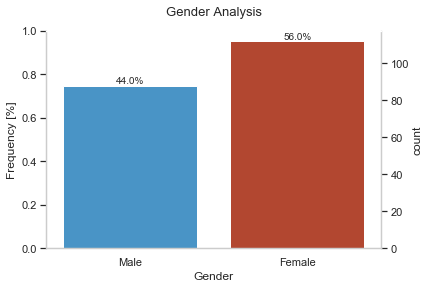

In [75]:
# Plotando
custom_colors = ["#3498db", "#C8391A"]
count_plot(feature='Gender', colors=custom_colors)

In [30]:
# Criando categoria de idade
df['Age'].describe()

count    200.000000
mean      38.850000
std       13.969007
min       18.000000
25%       28.750000
50%       36.000000
75%       49.000000
max       70.000000
Name: Age, dtype: float64

In [31]:
# Categorizando
bins = [18, 22, 50, 70]
labels = ['Jovem', 'Adulto', 'Idoso']
df['Age Range'] = pd.cut(df['Age'], bins=bins, labels=labels, right=False)

df.head()

CustomerID  Gender  Age  Annual Income (k$)  Spending Score (1-100)  \
0           1    Male   19                  15                      39   
1           2    Male   21                  15                      81   
2           3  Female   20                  16                       6   
3           4  Female   23                  16                      77   
4           5  Female   31                  17                      40   

  Age Range Custom Class  
0     Jovem        Médio  
1     Jovem        Ótimo  
2     Jovem         Ruim  
3    Adulto        Ótimo  
4    Adulto        Médio

In [32]:
# Categorizando Pontuação de Gastos
desc_score = df['Spending Score (1-100)'].describe()
desc_score

count    200.000000
mean      50.200000
std       25.823522
min        1.000000
25%       34.750000
50%       50.000000
75%       73.000000
max       99.000000
Name: Spending Score (1-100), dtype: float64

In [33]:
# Categorizando
bins = [desc_score['min'], desc_score['25%'], desc_score['50%'], desc_score['75%'],
        desc_score['max']]
labels = ['Ruim', 'Médio', 'Bom', 'Ótimo']

df['Custom Class'] = pd.cut(df['Spending Score (1-100)'], bins=bins, 
                            labels=labels, right=False)
df.head()

CustomerID  Gender  Age  Annual Income (k$)  Spending Score (1-100)  \
0           1    Male   19                  15                      39   
1           2    Male   21                  15                      81   
2           3  Female   20                  16                       6   
3           4  Female   23                  16                      77   
4           5  Female   31                  17                      40   

  Age Range Custom Class  
0     Jovem        Médio  
1     Jovem        Ótimo  
2     Jovem         Ruim  
3    Adulto        Ótimo  
4    Adulto        Médio

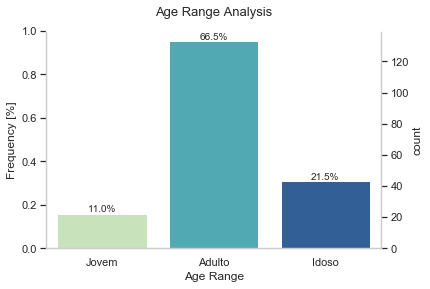

In [76]:
# Plotando
count_plot(feature='Age Range', colors='YlGnBu')

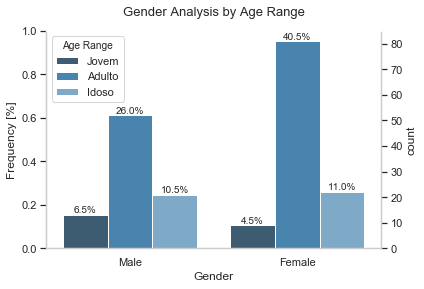

In [77]:
# Verificando quantidade de instâncias por gênero e age range
count_plot(feature='Gender', hue='Age Range')

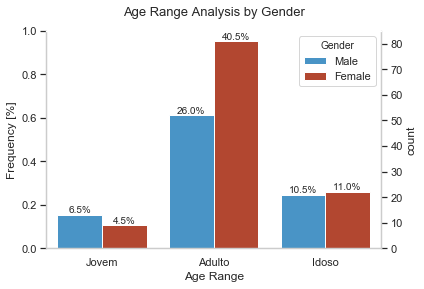

In [78]:
# Talvez a visão invertida seja melhor
count_plot(feature='Age Range', colors=custom_colors, hue='Gender')

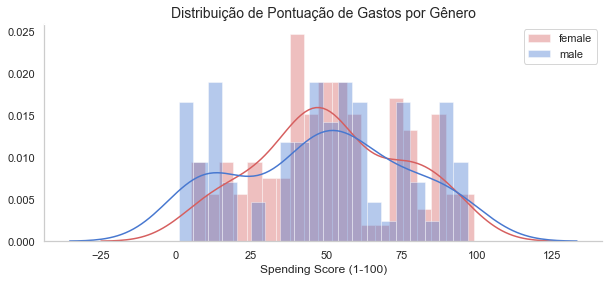

In [79]:
# Ditribution
fig, ax = plt.subplots(figsize=(10, 4), sharex=True)
female = df.loc[df['Gender'] == 'Female']
male = df.loc[df['Gender'] == 'Male']
ax = sns.distplot(female['Spending Score (1-100)'], bins=20, label='female', 
                  color='r')
ax = sns.distplot(male['Spending Score (1-100)'], bins=20, label='male')
ax.set_title('Distribuição de Pontuação de Gastos por Gênero', size=14)
format_spines(ax, right_border=False)
plt.legend()
plt.show()

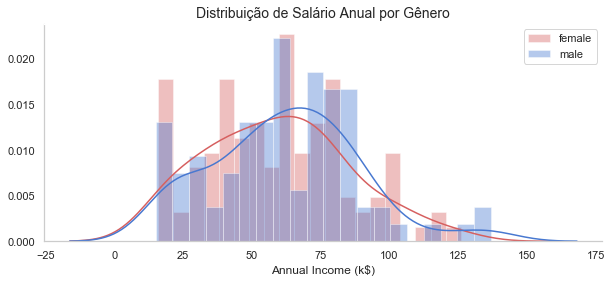

In [80]:
# Credit amount distribution
fig, ax = plt.subplots(figsize=(10, 4), sharex=True)
female = df.loc[df['Gender'] == 'Female']
male = df.loc[df['Gender'] == 'Male']
ax = sns.distplot(female['Annual Income (k$)'], bins=20, label='female', 
                  color='r', hist=True)
ax = sns.distplot(male['Annual Income (k$)'], bins=20, label='male')
ax.set_title('Distribuição de Salário Anual por Gênero', size=14)
format_spines(ax, right_border=False)
plt.legend()
plt.show()

* **Conclusões:**

Os gráficos de distribuição de Pontuação de Gastos e Salário Anual indicam que existe uma maior concentração de baixa pontuação no gênero masculino (de 0 a 25 pontos). Em contra partida a maior concentração entre 25 e 50 e entre 100 e 125 pontos indicam que clientes do gênero feminino geralmente possuem maior score.

Quanto ao salário anual dos clientes deste shopping em específico, existe uma maior concentração masculina entre 50 e 100 e acima de 125.

Isto pode ser um indicativo sobre diferentes tratativas para gêneros com determinado score.

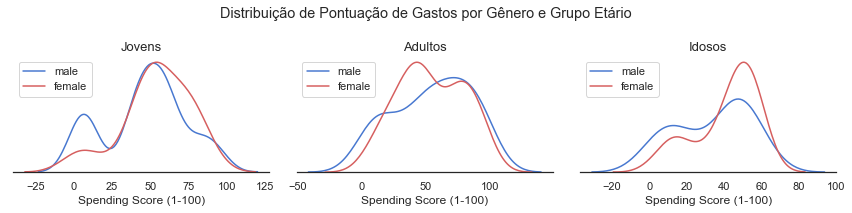

In [205]:
# Configurando plot
sns.set(style='white', palette='muted', color_codes=True)
fig, axs = plt.subplots(1, 3, figsize=(12, 3))
sns.despine(left=True)

# Indexando dataframes
young = df.loc[df['Age Range'] == 'Jovem']
adult = df.loc[df['Age Range'] == 'Adulto']
senior = df.loc[df['Age Range'] == 'Idoso']
titles = ['Jovens', 'Adultos', 'Idosos']
age_range_dataframes = [young, adult, senior]

for idx in range(3):
    age_range = age_range_dataframes[idx]
    axs[idx] = sns.distplot(age_range[age_range['Gender']=='Male']['Spending Score (1-100)'], 
                          bins=20, ax=axs[idx], label='male', color='b', hist=False)
    axs[idx] = sns.distplot(age_range[age_range['Gender']=='Female']['Spending Score (1-100)'], 
                          bins=20, ax=axs[idx], label='female', color='r', hist=False)
    axs[idx].set_title(titles[idx], size=13)

fig.suptitle('Distribuição de Pontuação de Gastos por Gênero e Grupo Etário')
plt.setp(axs, yticks=[])
plt.tight_layout()
plt.subplots_adjust(top=0.75)
plt.show()

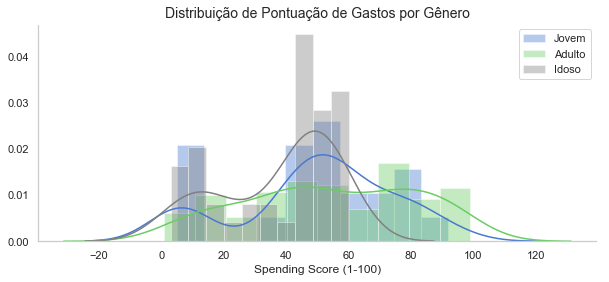

In [208]:
# Spending Score Distribution
fig, ax = plt.subplots(figsize=(10, 4), sharex=True)
young = df.loc[df['Age Range'] == 'Jovem']
adult = df.loc[df['Age Range'] == 'Adulto']
senior = df.loc[df['Age Range'] == 'Idoso']
ax = sns.distplot(young['Spending Score (1-100)'], bins=10, label='Jovem', color='b')
ax = sns.distplot(adult['Spending Score (1-100)'], bins=10, label='Adulto', color='g')
ax = sns.distplot(senior['Spending Score (1-100)'], bins=10, label='Idoso', color='grey')
ax.set_title('Distribuição de Pontuação de Gastos por Gênero', size=14)
format_spines(ax, right_border=False)
plt.legend()
plt.show()

**Conclusões:**
* **1.** Pontuação de gastos idosos se concentram entre baixos e médios scores;
* **2.** Adultos possuem concentração de pontuação em altos índices;
* **3.** Na comparação por gênero, o feminino se sobressai ao masculino em Jovens e Idosos, indicando que nestas faixas etárias, mulheres possuem um melhor score.

Talvez a estratégia deste shopping seja em criar estratégias diferentes para cada faixa etária por gênero, sabendo a distribuição média de score de cada feature cruzada.

## Treinando KMeans

Com os insights tomados, vamos aplicar a um modelo de agrupamento de clientes.

[https://scikit-learn.org/stable/modules/generated/sklearn.cluster.KMeans.html](https://scikit-learn.org/stable/modules/generated/sklearn.cluster.KMeans.html)

In [136]:
# Verificando dataset
df.head()

CustomerID  Gender  Age  Annual Income (k$)  Spending Score (1-100)  \
0           1    Male   19                  15                      39   
1           2    Male   21                  15                      81   
2           3  Female   20                  16                       6   
3           4  Female   23                  16                      77   
4           5  Female   31                  17                      40   

  Age Range Custom Class  
0     Jovem        Médio  
1     Jovem        Ótimo  
2     Jovem         Ruim  
3    Adulto        Ótimo  
4    Adulto        Médio

In [137]:
# Importando biblioteca
from sklearn.cluster import KMeans

### Idade e Score

In [159]:
# Definindo função para aplicação do método do cotovelo
def compute_square_distances(df, Kmin=1, Kmax=12):
    square_dist = []
    K = range(Kmin, Kmax)
    for k in K:
        km = KMeans(n_clusters=k)
        km.fit(df)
        square_dist.append(km.inertia_)
    return K, square_dist

# Definindo função para plotar o método do cotovelo
def plot_elbow_method(df, Kmin=1, Kmax=12):
    # Calculando distâncias
    K, square_dist = compute_square_distances(df, Kmin, Kmax)
    
    # Plotando
    fig, ax = plt.subplots()
    ax.plot(K, square_dist, 'bo-')
    format_spines(ax, right_border=False)
    plt.xlabel('Clusters')
    plt.ylabel('Sum of square dist')
    plt.title(f'Método Elbow - {df.columns[0]} e {df.columns[1]}', size=14)
    plt.show()

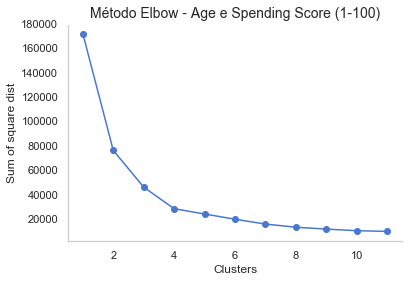

In [160]:
# Indexando Dataframe
df_1 = df.loc[:, ['Age', 'Spending Score (1-100)']]

# Visualizando k ótimo
plot_elbow_method(df_1)

Pelo gráfico acima, verificamos que o K ótimo (número de clusters) é igual a 4.

In [184]:
# Definindo função para plotagem dos dados agrupados 
def plot_kmeans(df, y_kmeans, centers):
    """docstring for plotKMeans
    função responsável pela plotagem dos dados já agrupados pelo algoritmo KMeans
    Input:
        df: dados a serem agrupados
        y_kmeans: predição de dados já agrupados
        centers: centróide de cada cluster"""
    
    # Configurando e realizando plotagem
    X = df.values
    sns.set(style='white', palette='muted', color_codes=True)
    fix, ax = plt.subplots(figsize=(7, 5))
    ax.scatter(X[:, 0], X[:, 1], c=y_kmeans, s=50, cmap='plasma')
    ax.scatter(centers[:, 0], centers[:, 1], c='black', s=200, alpha=0.5)
    ax.set_title('KMeans Aplicado', size=14)
    ax.set_xlabel(f'{df.columns[0]}', size=12, labelpad=5)
    ax.set_ylabel(f'{df.columns[1]}', size=12, labelpad=5)
    format_spines(ax, right_border=False)
    plt.show()

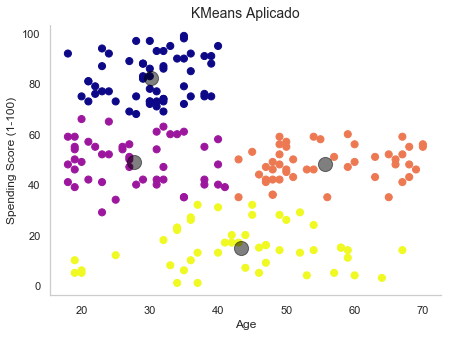

In [185]:
# Treinando kmeans
k_means = KMeans(n_clusters=4)
k_means.fit(df_1)
y_kmeans = k_means.predict(df_1)
centers = k_means.cluster_centers_
plot_kmeans(df_1, y_kmeans, centers)

**Análise:**

Podemos tirar algumas conclusões de cada um dos 4 clusters obtidos com os atributos `Age` e `Spending Score`:

* **Grupo 1: Amarelo** - Este cluster agrupa clientes que, independente da idade, apresentam baixo índice de score. Para estes clientes, seria necessaria uma atitude diferente por parte dos lojistas pois, sabendo do baixo score, quem sabe uma ação de marketing efetiva, uma abordagem diferenciada ou a aplicação de uma nova experiência para estes clientes não façam com que os mesmos apresentem maiores scores.

* **Grupo 2: Roxo** - Este cluster identifica clientes jovens (idade menor que 40 anos) com scores medianos (entre 35 e 70). Se a intenção for aumentar o score dos clientes, seria necessário abordar este grupo com atitudes voltadas ao público jovem, como promoções, atrações ligadas a games, produtos personalizados, entre outras.
* **Grupo 3: Laranja** - Neste grupo, temos clientes com idade maior que 40 anos com score mediano. Analogamente ao grupo 2 roxo, temos que trabalhar neste grupo laranja com ações voltadas ao público de meia idade e ao público idoso, proporcionando a estes boas experiências de acordo com os possíveis padrões desta faixa etária. O shopping poderia proporcionar, entre outras experiência, espaços calmos para relaxamento, restaurantes típicos nas praças de alimentação, opções de compra com coleções específicas de vestuário, etc.
* **Grupo 4: Azul Escuro** - Este é o grupo composto por aqueles que apresentam um alto score (acima de 75). As ações para este grupo devem focar, em primeiro lugar, na manutenção do score seguida de um aumento para as entradas próximas de 75 de score. É preciso entender as preferências deste público (todos com idade abaixo de 40 anos) e manter tais serviços, sempre com qualidade, criatividade e inovação, visando sempre o score máximo.

### Salário Anual e Score

Vamos analisar agora o comportamento dos clientes quando agrupados por `Salário Anual` e `Score`.

In [192]:
help(plot_elbow_method)

Help on function plot_elbow_method in module __main__:

plot_elbow_method(df, Kmin=1, Kmax=12)
    # Definindo função para plotar o método do cotovelo



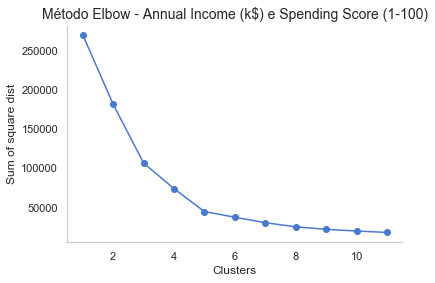

In [193]:
# Indexando dataframe
df_2 = df.loc[:, ['Annual Income (k$)', 'Spending Score (1-100)']]

# Procurando k ótimo
plot_elbow_method(df_2)

Vamos agrupar os dados em 5 clusters diferentes.

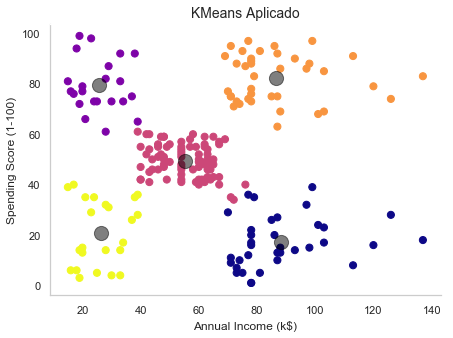

In [195]:
# Treinando e visualizando
k_means = KMeans(n_clusters=5)
k_means.fit(df_2)
y_kmeans = k_means.predict(df_2)
centers = k_means.cluster_centers_
plot_kmeans(df_2, y_kmeans, centers)